In [1]:
# loading essential libraries first
import pandas as pd
import numpy as npjupyter
from numpy import array
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import pickle
import requests
import json
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split # for dividing data into training and test sets
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Cleaned and merged dataset is located in the [Preprocessing Folder](https://github.com/ussyed11/Covid-19-Impact-on-Mental-Illness-in-USA/blob/main/Data%20Preprocessing/dep_covod%2077.ipynb)

In [2]:
# Read the csv to load the cleaned and merged data from "all_data_merged.csv file. 
df = pd.read_csv("all_data_merged.csv")

In [3]:
# Make a df copy
ml_alg = df.copy()
ml_alg.head()

,Unnamed: 0,Year,State,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,...,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
0,0,2017,Alabama,1,712000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
1,1,2018,Alabama,1,217000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
2,2,2019,Alabama,1,680000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
3,3,2020,Alabama,1,794000,362015,7189,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
4,4,2021,Alabama,1,794000,904526,16747,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958


In [4]:
# Drop the Unnammed column
ml_alg.drop(['Unnamed: 0'], axis = 1, inplace = True)
ml_alg.dtypes

Year                                  int64
State                                object
FIPS                                  int64
18_or_Older_AMI_Total                 int64
Tot_Cases                             int64
Toth_Deaths                           int64
<High School                          int64
High School                           int64
Some college or associates degree     int64
Bachelors degree or higher            int64
Employed_2017                         int64
Unemployed_2017                       int64
Employed_2018                         int64
Unemployed_2018                       int64
Employed_2019                         int64
Unemployed_2019                       int64
Employed_2020                         int64
Unemployed_2020                       int64
Employed_2021                         int64
Unemployed_2021                       int64
Median_Household_Income_2020          int64
dtype: object

#### Feature Engineering

In [5]:
# Rename columns for better understanding the numbers
ml_alg.rename(columns = {'Tot_Cases': 'Covid_Total', 'Toth_Deaths': 'Covid_Deaths'}, inplace = True)
ml_alg.head()

,Year,State,FIPS,18_or_Older_AMI_Total,Covid_Total,Covid_Deaths,<High School,High School,Some college or associates degree,Bachelors degree or higher,...,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
0,2017,Alabama,1,712000,0,0,438947,1014342,1013673,877044,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
1,2018,Alabama,1,217000,0,0,438947,1014342,1013673,877044,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
2,2019,Alabama,1,680000,0,0,438947,1014342,1013673,877044,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
3,2020,Alabama,1,794000,362015,7189,438947,1014342,1013673,877044,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
4,2021,Alabama,1,794000,904526,16747,438947,1014342,1013673,877044,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958


In [6]:
### Correlation quantifies the direction and strength of the relationship between two numeric variables, X and Y, and always lies between -1.0 and 1.0. Simple linear regression relates X to Y through an equation of the form Y = a + bX.

In [7]:
# Choose columns to check for correlation in features.
corr_def = ml_alg[['State','Year', '18_or_Older_AMI_Total', 'Covid_Total', 'Covid_Deaths', '<High School', 'High School', 'Some college or associates degree','Bachelors degree or higher', 'Employed_2017', 'Unemployed_2017', 'Employed_2018', 'Unemployed_2018', 'Employed_2019', 'Unemployed_2019', 'Employed_2020', 'Unemployed_2020', 'Employed_2021', 'Unemployed_2021', 'Median_Household_Income_2020' ]]

In [8]:
# Check for correlation in columns.
corr = corr_def.corr()
corr

,Year,18_or_Older_AMI_Total,Covid_Total,Covid_Deaths,<High School,High School,Some college or associates degree,Bachelors degree or higher,Employed_2017,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
Year,1.000000,0.066445,0.525123,0.521407,0.015686,0.019130,0.014776,0.024411,0.020015,0.018212,0.019844,0.017056,0.019759,0.016787,0.019279,0.018855,0.018441,0.018347,0.015760
18_or_Older_AMI_Total,0.066445,1.000000,0.515617,0.502740,0.752993,0.756026,0.768053,0.776856,0.776338,0.772090,0.776118,0.772482,0.775962,0.771195,0.774187,0.769556,0.772631,0.764916,0.159211
Covid_Total,0.525123,0.515617,1.000000,0.984066,0.447052,0.461591,0.459944,0.456904,0.462199,0.455599,0.462334,0.454738,0.462504,0.450829,0.462906,0.448874,0.463159,0.441844,0.051810
Covid_Deaths,0.521407,0.502740,0.984066,1.000000,0.434305,0.465151,0.448774,0.449011,0.454987,0.449283,0.455251,0.448485,0.455674,0.442510,0.456768,0.440082,0.457296,0.432352,0.048388
<High School,0.015686,0.752993,0.447052,0.434305,1.000000,0.924143,0.974880,0.966813,0.975146,0.974961,0.975505,0.974441,0.975295,0.971274,0.973977,0.972489,0.974178,0.978582,0.136899
High School,0.019130,0.756026,0.461591,0.465151,0.924143,1.000000,0.968250,0.953301,0.971819,0.964630,0.971838,0.963891,0.972267,0.956963,0.973678,0.944015,0.974523,0.925561,0.073856
Some college or associates degree,0.014776,0.768053,0.459944,0.448774,0.974880,0.968250,1.000000,0.980731,0.991979,0.985854,0.992335,0.986682,0.992585,0.983223,0.992514,0.976961,0.993204,0.966944,0.134208
Bachelors degree or higher,0.024411,0.776856,0.456904,0.449011,0.966813,0.953301,0.980731,1.000000,0.993610,0.988359,0.993435,0.988314,0.993272,0.984306,0.990909,0.989315,0.989791,0.984138,0.258030
Employed_2017,0.020015,0.776338,0.462199,0.454987,0.975146,0.971819,0.991979,0.993610,1.000000,0.993155,0.999966,0.993596,0.999874,0.989680,0.999259,0.986515,0.998758,0.981092,0.191244
Unemployed_2017,0.018212,0.772090,0.455599,0.449283,0.974961,0.964630,0.985854,0.988359,0.993155,1.000000,0.992734,0.999095,0.992345,0.996916,0.990337,0.990979,0.989331,0.986393,0.171828


<AxesSubplot:>

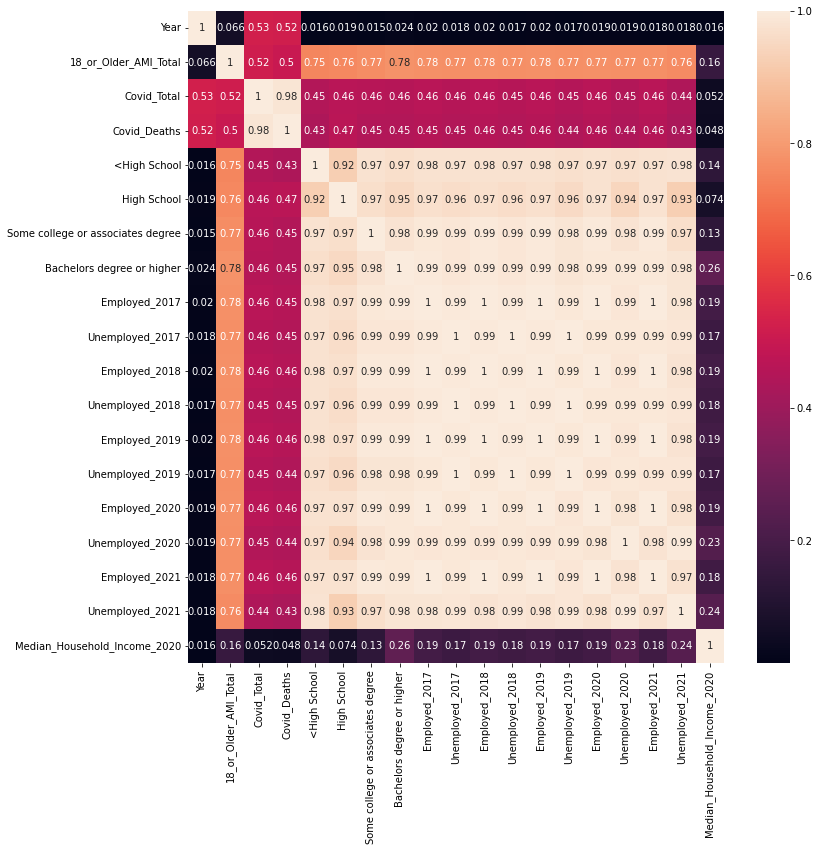

In [9]:
# Generate heatmap to visualize correlation between features
plt.figure(figsize = (12,12))
sns.heatmap((corr), annot = True)

In [10]:
# Check correlation for the two variables only: AMI cases and Covid Total Cases
covid_ami = ml_alg[['18_or_Older_AMI_Total', 'Covid_Total']].copy()
corr2 = covid_ami.corr()

<AxesSubplot:>

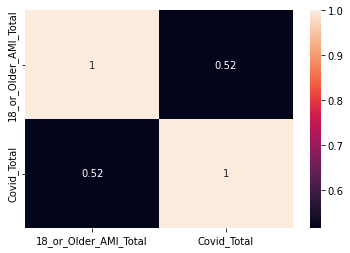

In [11]:
# Generate heatmap for the two columns only: AMI cases and Covid Total Cases
sns.heatmap((corr2), annot = True)

In [12]:
# # Convert State to numerical through get dummies function
# dummies= pd.get_dummies(ml_alg.State)
# dummies.head()

In [13]:
# # Merge dummies with ml_alg df while dropping the last column
# ml_df = pd.concat([ml_alg, dummies.drop('Wyoming',axis= 1)],axis= 1)
# ml_df.head()

In [14]:
# Get columns names
ml_alg.shape

(239, 21)

In [15]:
# select model feature and target
# Select fetures for multi variant regression
X = ml_alg.drop(["18_or_Older_AMI_Total", 'State'], axis = 1)
y = ml_alg[['18_or_Older_AMI_Total']]

In [16]:
#  Check our feature input shape
X.shape

(239, 19)

In [17]:
# Check our feature target/output shape
y.shape

(239, 1)

### Multivariate Regression

In [18]:
# Use train_test_split from Sklearn for dividing into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# create a Linear Regression model object
lr = LinearRegression()

In [20]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
lr.fit(X_train, y_train)
training_score = lr.score(X_train, y_train)
testing_score = lr.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5755724663506947
Testing Score: 0.8888796621650337


In [22]:
# Get multiple predictions
y_predict = lr.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[5694678.25277972],
       [ 272348.86916639],
       [1192758.55129533],
       [1089095.69519357],
       [1682392.67377129]])

In [23]:
# Upload to pickle for transfering
pickle.dump(lr, open('model.pkl','wb'))

In [24]:
# Save The model to use in flask
ml_model = pickle.load(open('model.pkl','rb'))
# print(ml_model.predict(X))
r = ml_model.score(X_test, y_test)
r

0.8888796621650337

In [25]:
# Save the columns as json file to use in flask app integration
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [26]:
# r2_score_df2 = r2_score(y_test, y_predict)
# r2_score_df2



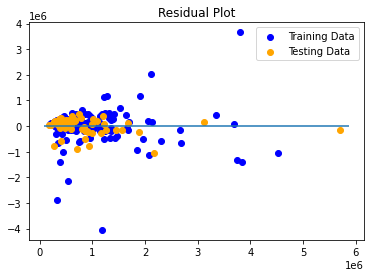

In [27]:
# Plot the residuals for the training and testing data.
# We want our predictions to be close to zero on the y-axis in this plot.
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

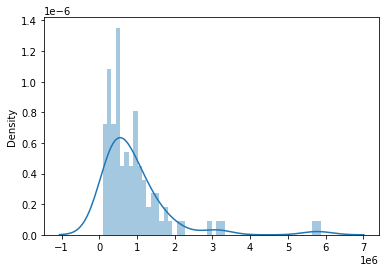

In [49]:
# Visualize our predictions 
import seaborn as sns
predictions = lr.predict(X_test)
sns.distplot((y_test, predictions),bins=50);

# Other regression models to find the best performing model using GridSearchCV

In [28]:
# Importing other regression models to find the best performing model using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [67]:
# Define a function to run regression models
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model':LinearRegression(),
            'params': {'normalize':[True, False]}
    
        },'decision_tree_regressor':{
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['mse','friedman_mse'], 'splitter':['best', 'random']}
        }, 'GBR': {
            'model': GradientBoostingRegressor(),
            'params': {'n_estimators':[100,500,1000], 'subsample':[0.9, 0.5, 0.2, 0.1], 'max_depth':[4,6,8], 'learning_rate':[0.01,0.02,0.03]}
        }, 'RR': {
            'model': Ridge(),
            'params': {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
        }
    }

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    scores = []

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], return_train_score=True, n_jobs=-1, cv=cv)
        gs.fit(X, y)
    
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_ ,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [68]:
# Find the best performing model using GridSearchCV
find_best_model_using_gridsearchcv(X, y)

/Users/uzmasyed/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/Users/uzmasyed/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


,model,best_score,best_params
0,linear_regression,0.412631,{'normalize': True}
1,decision_tree_regressor,0.318279,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,GBR,0.462834,"{'learning_rate': 0.03, 'max_depth': 6, 'n_est..."
3,RR,0.412631,{'alpha': 1e-15}


### Gradient Boosting Regressor Model Fit

In [33]:
# Hyperparameters for GradientBoostingRegressor
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [34]:
# Create an instance of gradient boosting regressor
gbr = GradientBoostingRegressor(**gbr_params)

In [35]:
# Fit the model
gbr.fit(X, y)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [36]:
# Print Coefficient of determination R^2
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))

Model Accuracy: 0.947


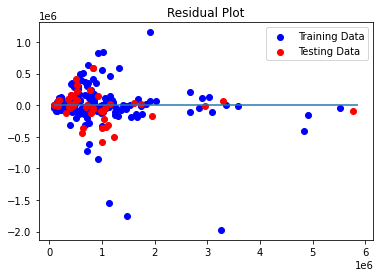

In [37]:
# Plot the Residuals for the Training and Testing data

predictions2 = np.expand_dims(gbr.predict(X_test), axis = 1)
plt.scatter((np.expand_dims(gbr.predict(X_train), axis = 1)), (np.expand_dims(gbr.predict(X_train), axis = 1)) - y_train, c="blue", label="Training Data")
plt.scatter(predictions2, predictions2 - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()


In [50]:
# Print R Squared score
r_2 = gbr.score(X_test, y_test)
print(f"R2: {r_2}")

R2: 0.9469471910746339


In [51]:
# Check Gradient Boosting features importances
importances_gb =  gbr.feature_importances_
importances_gb

array([0.2203545 , 0.02421546, 0.0148283 , 0.00565505, 0.06744822,
       0.02335833, 0.06350588, 0.048986  , 0.0481481 , 0.09081904,
       0.02761995, 0.03146151, 0.05083906, 0.05218626, 0.04264626,
       0.04845235, 0.0648356 , 0.0204093 , 0.05423083])

In [52]:
# Get multiple predictions
y_predict = gbr.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([5768005.52245278,  618670.73041274,  928966.72375889,
        834464.65539614, 1606062.14122383])

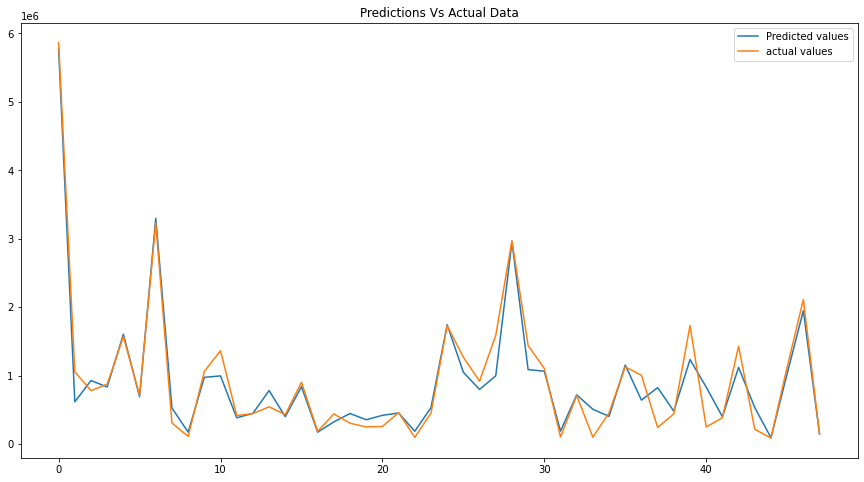

In [53]:
# Compare predictions with the actual data
# creating x_axis for simplicity
x_axis = [i for i in range(len(y_test))]

# importing the module
import matplotlib.pyplot as plt

# fitting the size of the plot
plt.figure(figsize=(15, 8))

# plotting the graphs
plt.plot(x_axis, y_predict, label="Predicted values")
plt.plot(x_axis,y_test, label="actual values")
plt.legend()
plt.title("Predictions Vs Actual Data")
plt.show()#

In [54]:
# Checking X-train columns
X_train.columns

Index(['Year', 'FIPS', 'Covid_Total', 'Covid_Deaths', '<High School',
       'High School', 'Some college or associates degree',
       'Bachelors degree or higher', 'Employed_2017', 'Unemployed_2017',
       'Employed_2018', 'Unemployed_2018', 'Employed_2019', 'Unemployed_2019',
       'Employed_2020', 'Unemployed_2020', 'Employed_2021', 'Unemployed_2021',
       'Median_Household_Income_2020'],
      dtype='object')

In [55]:
# Assigning X_train columns to a variable to create a series
columns = X_train.columns

In [56]:
# Combine columns with feature importances
gb_graph = pd.Series(importances_gb, columns)
gb_graph


Year                                 0.220354
FIPS                                 0.024215
Covid_Total                          0.014828
Covid_Deaths                         0.005655
<High School                         0.067448
High School                          0.023358
Some college or associates degree    0.063506
Bachelors degree or higher           0.048986
Employed_2017                        0.048148
Unemployed_2017                      0.090819
Employed_2018                        0.027620
Unemployed_2018                      0.031462
Employed_2019                        0.050839
Unemployed_2019                      0.052186
Employed_2020                        0.042646
Unemployed_2020                      0.048452
Employed_2021                        0.064836
Unemployed_2021                      0.020409
Median_Household_Income_2020         0.054231
dtype: float64

Text(0.5, 1.0, 'Gradient Boosting Model')

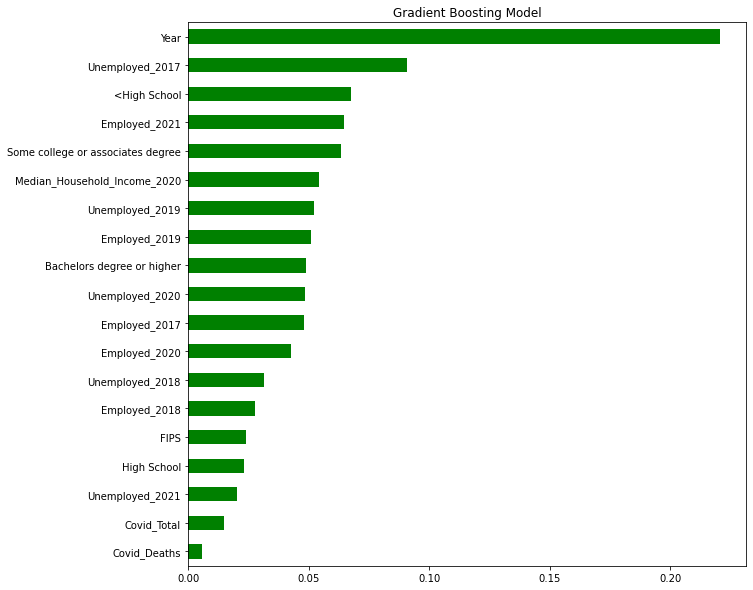

In [57]:
# Visualizing the importance from our features
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
gb_graph.sort_values().plot.barh(color = 'green')
plt.title("Gradient Boosting Model")

### Design and evaluate Ridge Regressor 

In [58]:
# Import Ridge regressor 
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='r2', cv=5)

ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [59]:
# Print the best parameters to fit the Ridge Regressor
ridge_regressor.best_params_

{'alpha': 20}

In [60]:
# Get the best fit model score
ridge_regressor.best_score_

0.4869793388617521